In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
import seaborn as sns

In [2]:
X_train, X_test, y_train, y_test = load('../../preprocessing/classification_data.joblib')

In [3]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('Train data:')
    model_info(y_train, y_train_pred)
    print('-----------------------------------------------')
    print('Test data:')
    model_info(y_test, y_test_pred)
    
    return model, y_train_pred, y_test_pred

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [5]:
def model_info(y_real, y_pred):
    #vizualizacija matrice konfuzije
    cm = confusion_matrix(y_real, y_pred)

    plt.figure(figsize=(4, 3))
    sns.set(font_scale=1)

    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        linewidths=0.5,
        cbar=False,
        square=True,
        xticklabels=['Zlato', 'Srebro', 'Bronza', 'Nista'],
        yticklabels=['Zlato', 'Srebro', 'Bronza', 'Nista'],
    )

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('F1 score: ', f1_score(y_real, y_pred, average='macro'))
    

In [6]:
print(X_train.size)
print(y_train.size)
print(X_test.size)
print(y_test.size)

662151
94593
283787
40541


In [7]:
medalje = y_test.value_counts()
print(medalje)

Medal
Gold      10931
Bronze    10890
Silver    10798
No         7922
Name: count, dtype: int64


## Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
medalje = y_train.value_counts()
print(medalje)

Train data:


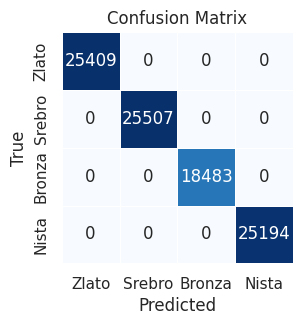

Accuracy score:  1.0
F1 score:  1.0
-----------------------------------------------
Test data:


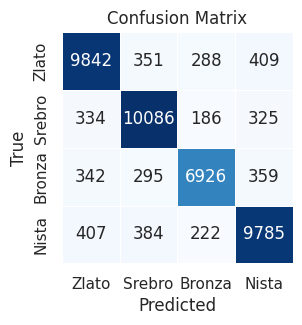

Accuracy score:  0.9037517574800819
F1 score:  0.902814724740074


In [9]:
dtc = DecisionTreeClassifier(random_state=22)
dtc_model, y_train_pred_dtc, y_test_pred_dtc = build_model(dtc, X_train, X_test, y_train, y_test)

In [10]:
# plt.figure(figsize=(50, 33))
# _=plot_tree(dtc_model, feature_names = X_train.columns, class_names = ['Zlato', 'Srebro', 'Bronza', 'Nista'], filled = True, rounded = True)
# plt.title("Decision tree")
# plt.show()

# num_nodes = dtc_model.tree_.node_count
# depth = dtc_model.tree_.max_depth
# print(f'Broj čvorova: {num_nodes}, dubina: {depth}')

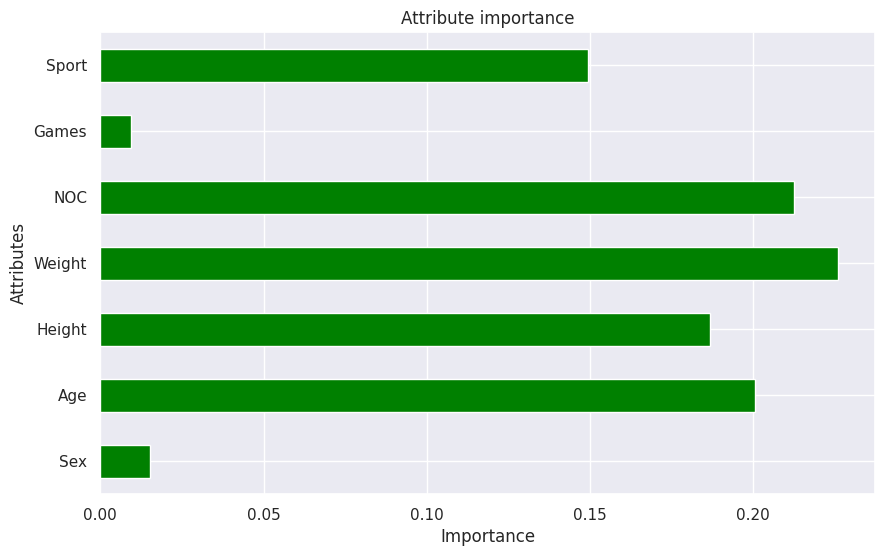

In [11]:
feature_importance = pd.Series(dtc_model.feature_importances_, index = X_train.columns)

plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

## Optimizacija DecisionTree modela

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 39],
    'min_samples_leaf': [3, 4, 5, 6],
    'class_weight': [None, 'balanced']
}

In [14]:
estimator_dtc = GridSearchCV(DecisionTreeClassifier(random_state = 22), param_grid = params, scoring = 'accuracy')

In [15]:
estimator_dtc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=22),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 39],
                         'min_samples_leaf': [3, 4, 5, 6]},
             scoring='accuracy')

In [16]:
print('Najbolji parametri: ')
estimator_dtc.best_params_

Najbolji parametri: 


{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 39,
 'min_samples_leaf': 3}

In [17]:
print('Najbolji rezultat:')
estimator_dtc.best_score_

Najbolji rezultat:


0.8555178968886231

Train data:


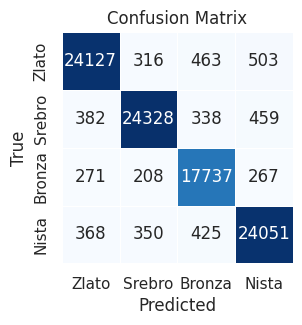

Accuracy score:  0.954013510513463
F1 score:  0.9535761381667348
-----------------------------------------------
Test data:


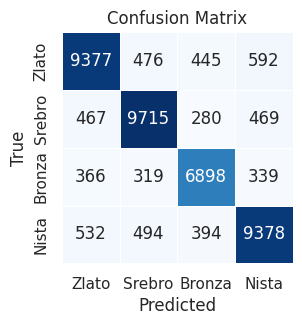

Accuracy score:  0.8724007794578328
F1 score:  0.8719011106948593


In [18]:
best_model_dtc, y_train_pred_dtccv, y_test_pred_dtccv = build_model(estimator_dtc.best_estimator_, X_train, X_test, y_train, y_test)

In [19]:
# plt.figure(figsize=(50, 33))
# _=plot_tree(best_model_dtc, feature_names = X_train.columns, class_names = ['Zlato', 'Srebro', 'Bronza', 'Nista'], filled = True, rounded = True)
# plt.title("Decision tree")
# plt.show()

# num_nodes = best_model_dtc.tree_.node_count
# depth = best_model_dtc.tree_.max_depth
# print(f'Broj čvorova: {num_nodes}, dubina: {depth}')

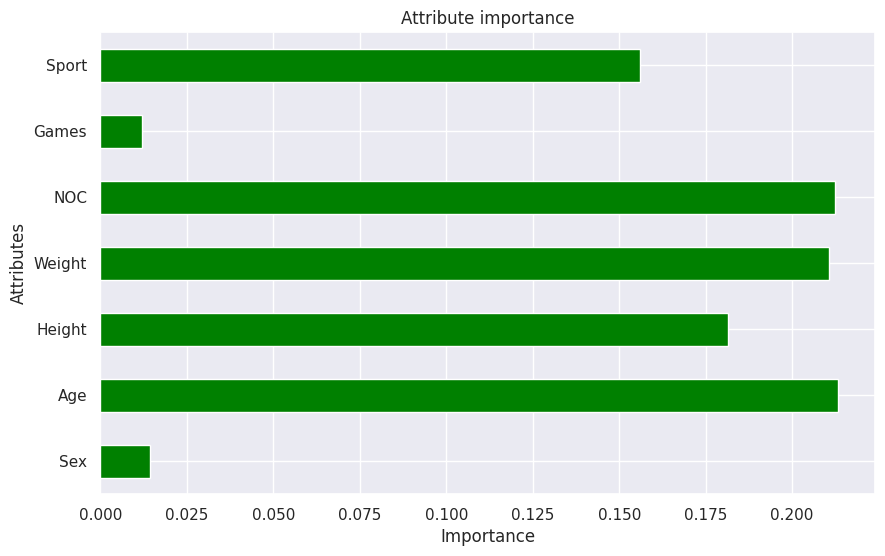

In [20]:
feature_importance = pd.Series(best_model_dtc.feature_importances_, index = X_train.columns)

plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

## Slucajne Sume

In [21]:
from sklearn.ensemble import RandomForestClassifier

Train data:


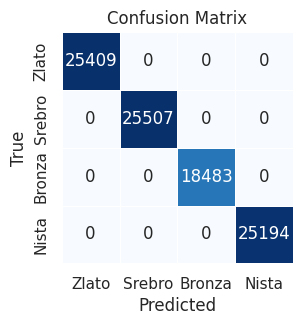

Accuracy score:  1.0
F1 score:  1.0
-----------------------------------------------
Test data:


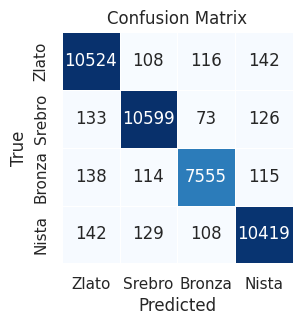

Accuracy score:  0.9643817370069806
F1 score:  0.9639308996561202


In [22]:
rf = RandomForestClassifier()
rf_model, y_train_pred_rf, y_test_pred_rf = build_model(rf, X_train, X_test, y_train, y_test)

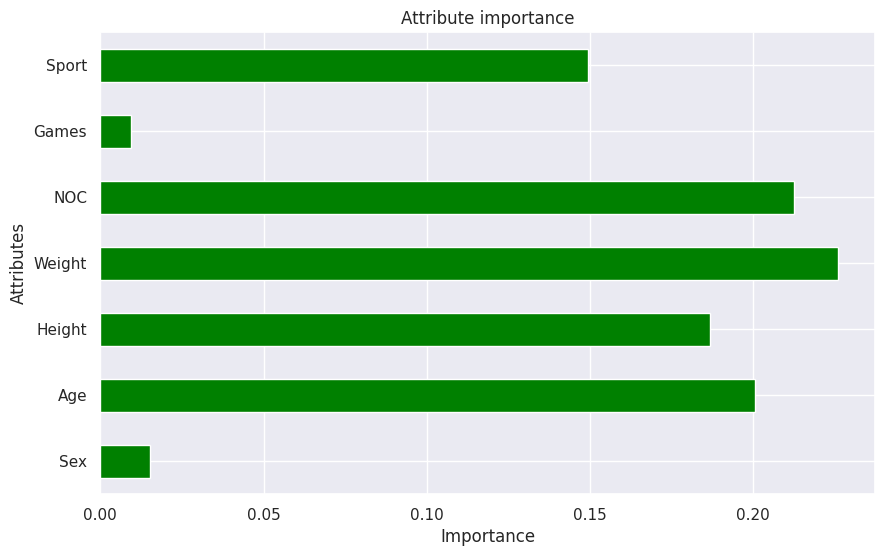

In [23]:
feature_importance = pd.Series(dtc_model.feature_importances_, index = X_train.columns)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

## Optimizacija RandomForest modela

In [24]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 200, 300, 400]
}

In [25]:
estimator_rf = GridSearchCV(RandomForestClassifier(), param_grid=params)

In [ ]:
estimator_rf.fit(X_train, y_train)

In [ ]:
print('Najbolji parametri: ')
estimator_rf.best_params_

In [ ]:
print('Najbolji rezultat: ')
estimator_rf.best_score_

In [ ]:
best_model_rf, y_train_pred_rfcv, y_test_pred_rfcv = build_model(estimator_rf.best_estimator_, X_train, X_test, y_train, y_test)

In [ ]:
feature_importance = pd.Series(best_model_rf.feature_importances_, index = X_train.columns)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()